In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit,fmin

In C:\Users\陆雨航\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\陆雨航\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\陆雨航\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\陆雨航\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor 

In [2]:
containing_folder='CdTe/PBE/'
df=pd.read_csv(containing_folder+'SUMMARY.fcc',sep='\s+', header=None)
df=df.set_index(0)
df

,1,2,3,4,5,6,7,8
0,,,,,,,,
3.19,1,F=,-4.690591,E0=,-4.690591,d,E,=-.469059E+01
3.22,1,F=,-4.741565,E0=,-4.741565,d,E,=-.474156E+01
3.25,1,F=,-4.776234,E0=,-4.776234,d,E,=-.477623E+01
3.28,1,F=,-4.796469,E0=,-4.796469,d,E,=-.479647E+01
3.31,1,F=,-4.804634,E0=,-4.804634,d,E,=-.480463E+01
3.34,1,F=,-4.799899,E0=,-4.799899,d,E,=-.479990E+01
3.37,1,F=,-4.784801,E0=,-4.784797,d,E,=-.478480E+01
3.40,1,F=,-4.759833,E0=,-4.759818,d,E,=-.475983E+01
3.43,1,F=,-4.726405,E0=,-4.726360,d,E,=-.472640E+01


<AxesSubplot:xlabel='0'>

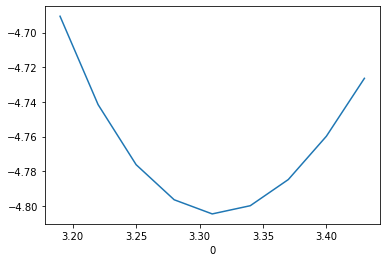

In [3]:
# df[3]=df[3].astype()
df[3].plot()


In [4]:
def quadrtic(x,a,b,c):
  return 1/2*a*x**2+b*x+c

popt,pcov=curve_fit(quadrtic,df.index,df[3])

In [5]:
lattice=np.linspace(df.index[0],df.index[-1],20)
energy_predict=quadrtic(lattice,popt[0],popt[1],popt[2])

3.3191265969887582

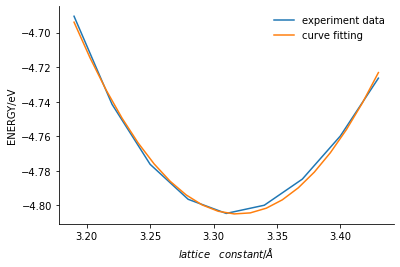

In [6]:
fig=plt.figure()
ax=plt.gca()
plt.plot(df.index,df[3],label='experiment data')
plt.plot(lattice,energy_predict,label='curve fitting')
plt.xlabel(r'$lattice\quadconstant/\AA$')
plt.ylabel('ENERGY/eV')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(frameon=False)
-popt[1]/popt[0]

In [31]:
'''
def BM_eq(length,E_0,V_0,B_0,B_note):
    # Birch–Murnaghan equation of state from wiki
    return E_0+9*V_0*B_0/16*(((V_0/length**3)**(2/3)-1)**3*B_note+((V_0/length**3)**(2/3)-1)**2*(6-4*(V_0/length**3)**(2/3)))

popt,pcov=curve_fit(BM_eq,df.index,df[3])
'''

In [32]:
'''
lattice=np.linspace(df.index[0],df.index[-1],20)
energy_predict_BM=BM_eq(lattice,popt[0],popt[1],popt[2],popt[3])
'''

In [16]:
# fig.savefig(containing_folder+'quadrtic_fitting',dpi=600)